In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hset=pd.read_csv('haberman.csv')

# Target - 
Perform EDA on Haberman dataset to predict whether the patient will survive after 5 years or not based upon the patient’s age, year of treatment and the number of positive lymph nodes.


In [475]:
#hset=hset.rename(columns={'status':'survival_upto_5years','nodes':'pos_lymnph_nodes'})

#hset.survival_upto_5years=hset.survival_upto_5years.replace({1:'lived',2:'died'})

hset.shape

print('The total data points are {0} and the total features are {1}'.format(hset.shape[0],hset.shape[1]))

print('The total datapoints based on class for survival upto 5 years :\n',hset['status'].value_counts())

The total data points are 306 and the total features are 4
The total datapoints based on class for survival upto 5 years :
 1    225
2     81
Name: status, dtype: int64


In [476]:
hset_lived=hset[hset['status']==1]
print("                       Lived      ")
print(hset_lived.describe())
hset_died=hset[hset['status']==2]
print("                       Died      ")
print(hset_died.describe())



                       Lived      
              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0
                       Died      
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


[0.7352941176470589, 0.2647058823529412]


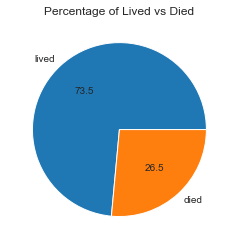

In [477]:
x=hset['status'].value_counts(normalize=True)
xl=[]
xl.append(x[1])
xl.append(x[2])
print(xl)

 
pl=pd.Series(data=xl,index=['lived','died'])
pie=pl.plot.pie(autopct='%.1f')
pie.set_ylabel('')
plt.title('Percentage of Lived vs Died')
plt.show()
 

#### Basic statistical observation


**We can find that the mean of pos_lymnph_nodes for both the classes have a huge gap.
The std deviation of pos_lymnph_nodes for both the classes have a considerable gap in values.
Rest of the parameters are more or less the same for both the classes. So by looking at the basic stats of both the classes, one would feel that the actual deciding factor for survival is **no of pos_lymnph_nodes** 

# Univariate Analysis

**We will see if we can find any insights using a single feature with the help of various plots
1.PDF
2.CDF
3.Box Plot
4.Violin Plot

## 1. PDFs

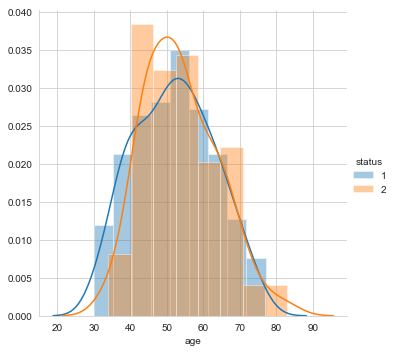

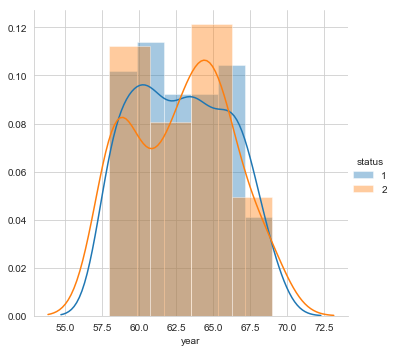

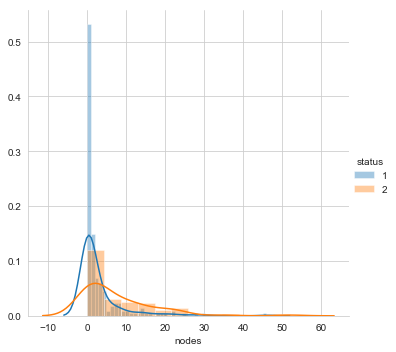

In [478]:
for index,feature in enumerate(list(hset.columns)[:-1]):
    x=sns.FacetGrid(hset,hue='status',size=5)
    x.map(sns.distplot,feature,hist=True).add_legend()


###### PDF Observations -

**One Can understand that the both the classes are differentiated with Node feature more than the other two.
1.The people who lived have comparitively less no. of positive lymnph nodes when compared to people who died.
2.The Percentage of people who lived is More than percentage of people who died having the no. of nodes < 10 

## 2.CDF's

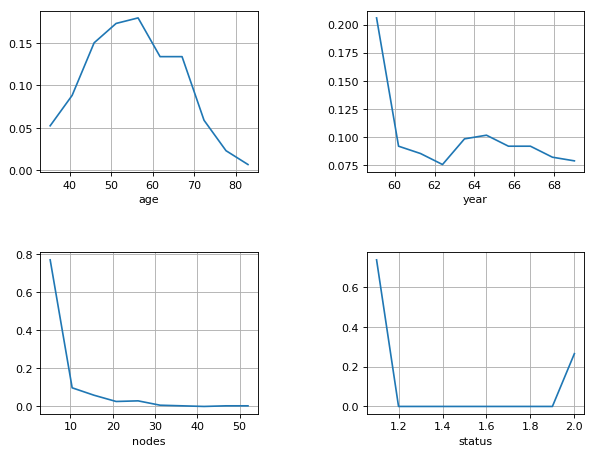

In [276]:
#Only PDF's for each feature

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.figure(1)
var=1
for index,feature in enumerate(list(hset.columns)):
    counts,bin_edges= np.histogram(hset[feature],bins=10,density=True)
    pdf=counts/sum(counts)
    a=220+var
    plt.subplot(a,xlabel=feature)
    plt.plot(bin_edges[1:],pdf)
    plt.grid()
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.5)
    var+=1


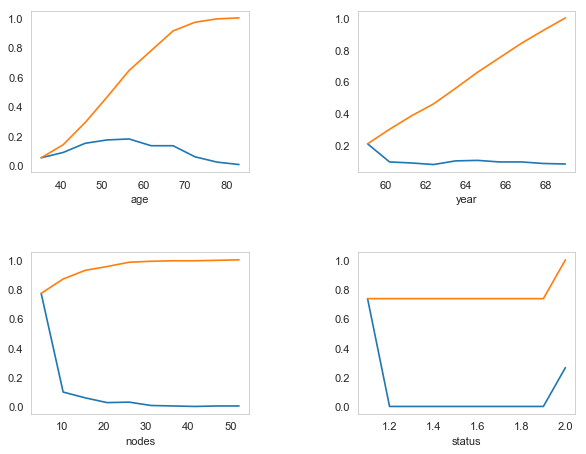

In [481]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.figure(1)
var=1
for index,feature in enumerate(list(hset.columns)):
    counts,bin_edges= np.histogram(hset[feature],bins=10,density=True)
    pdf=counts/sum(counts)
    a=220+var
    cdf=np.cumsum(pdf)
    plt.subplot(a,xlabel=feature)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.grid()
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,wspace=0.5)
    var+=1

##### CDF Observation -

**Almost 83% of the people have positive lymnph nodes less than 10
Around 60% of people are under the age of 64.
Nearly 76% of People have status 1 and 23% have staus 2.

## 3. Box Plots


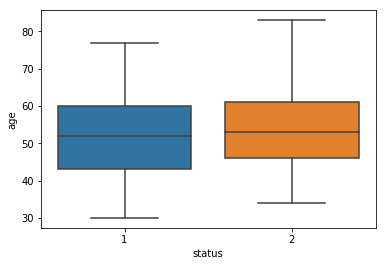

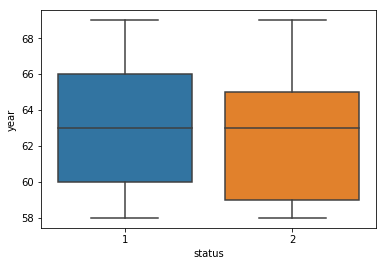

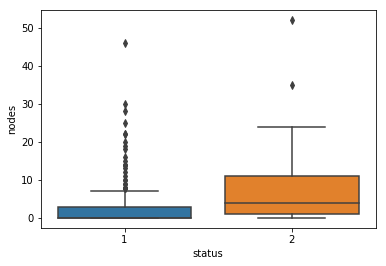

In [353]:
for index,feature in enumerate(list(hset.columns)[:-1]):
    sns.boxplot(x='status',y=feature,data=hset)
    plt.show()
   

##### BoxPlot Observation

**Looks like this data set has many outliers.
at 75 Percentile value -
People who lived have nearly 5 positive lymnph nodes.
People who died have nearly around 12 positive lymnph nodes.

**50% of people who died after operation had positive lymnph nodes less than 5

## 4. Violin Plots

In [ ]:
sns.violinplot(x='status',y='nodes')

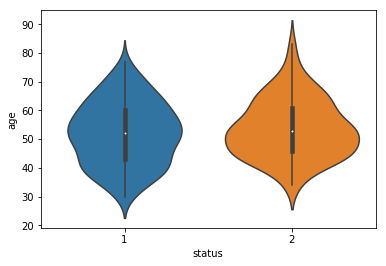

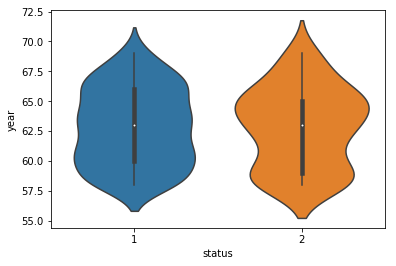

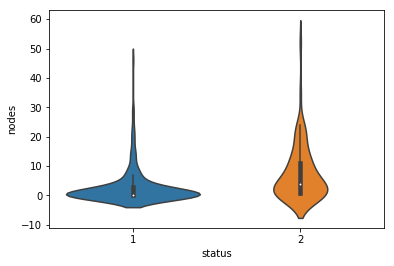

In [355]:
for index,feature in enumerate(list(hset.columns)[:-1]):
    sns.violinplot(x='status',y=feature,data=hset)
    plt.show()
    

##### Violin Plot Observations-

**Almost 50% of people who died are between the age 40-60.
Almost 75% of people who lived had positive lymnph nodes less than 5.
The Status-Year Violin plot gets Denser in between years 1964 and 1966 for people who are dead. 
Which tells us out all people who died , more no. of people died in between 1964 and 1966

# Bivariate Analysis

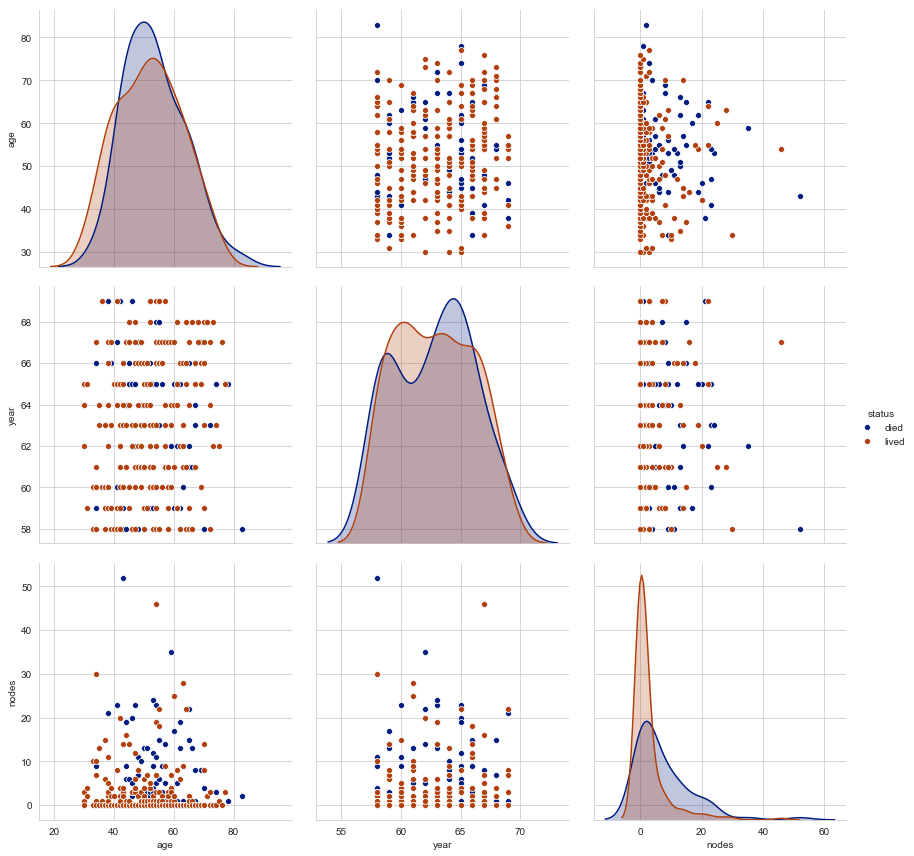

In [472]:
plt.close()
sns.set_style("whitegrid")

hsetplot=hset

hsetplot['status']=hset['status'].replace({    'yes':"lived",
    'no':"died"})

hsetplot['status']=hsetplot['status'].astype('category')

sns.pairplot(hsetplot,hue='status',size=4,palette='dark')



**Pairplots give the relation between two features for both classes.
We Couldnt get any useful data from the above scatter plots. You cannot distinguish the classes by using any pair of features.
The PDF dig for Nodes is useful in understanding that -
The People who lived and had 0-10 nodes are more when compared to people who died having and had nodes 0-10.